<h1 align="center" color='blue'>Multiple Regression</h1>

<img src="https://i.postimg.cc/SxgTV3tv/image.png" alt="Cars Price" height=100></img>

In [1]:
import numpy as np
import pandas as pd 
df = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")
df = df[['carwidth', 'carlength', 'curbweight','enginesize', 'horsepower', 'price']]
df.shape

(205, 6)

In [2]:
df.head(3)

,carwidth,carlength,curbweight,enginesize,horsepower,price
0,64.1,168.8,2548,130,111,13495.0
1,64.1,168.8,2548,130,111,16500.0
2,65.5,171.2,2823,152,154,16500.0


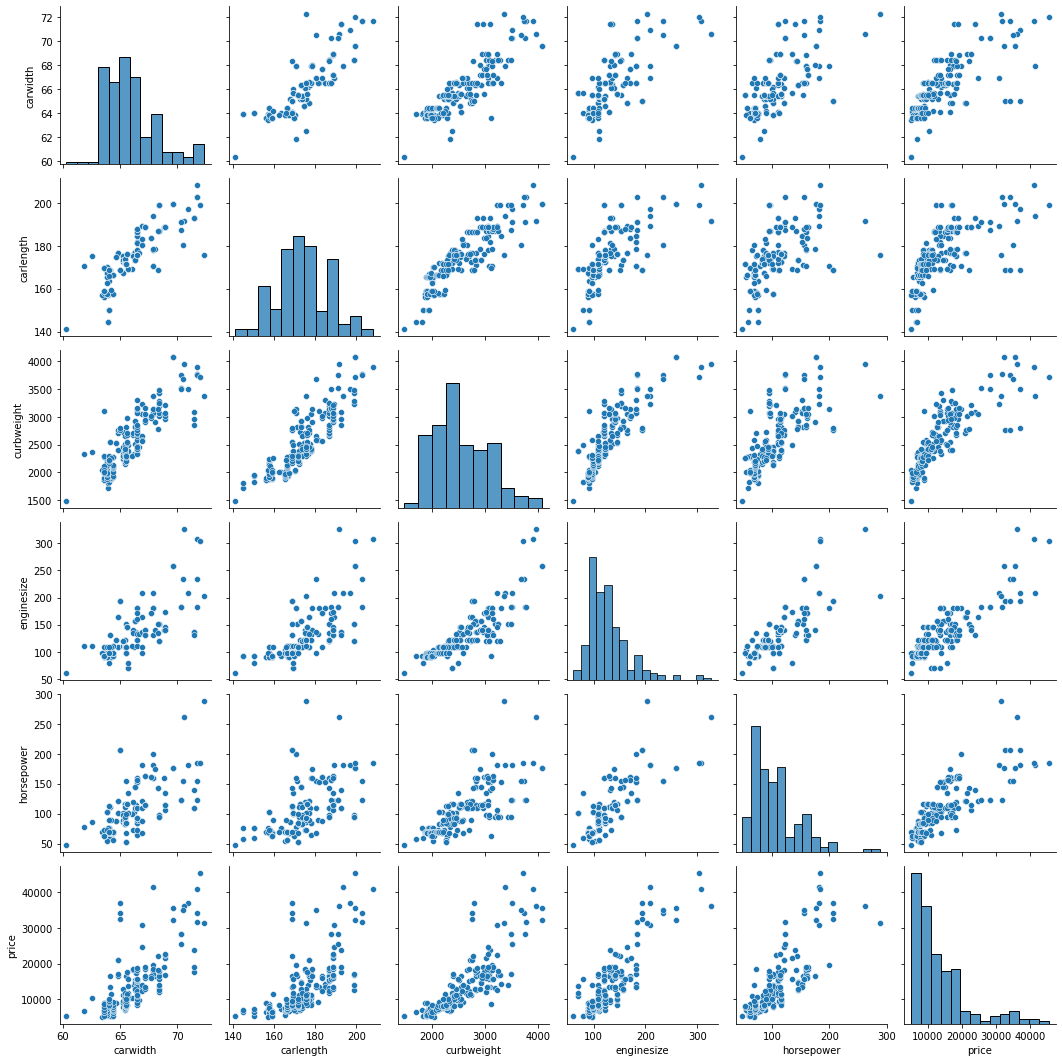

In [3]:
import seaborn as sns
sns.pairplot(df);

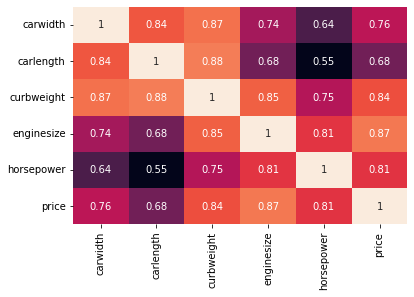

In [4]:
sns.heatmap(df.corr(), annot=True, cbar=False);

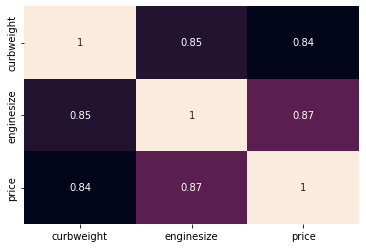

In [5]:
data = df[['curbweight','enginesize', 'price']]
sns.heatmap(data.corr(), annot=True, cbar=False);

In [6]:
data.iloc[:,:2]

,curbweight,enginesize
0,2548,130
1,2548,130
2,2823,152
3,2337,109
4,2824,136
...,...,...
200,2952,141
201,3049,141
202,3012,173
203,3217,145


In [7]:
import statsmodels.api as sm  
X = sm.add_constant(data.iloc[:,:2])
model = sm.OLS(data.iloc[:,2],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sat, 21 May 2022   Prob (F-statistic):           3.77e-70
Time:                        11:44:01   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+04   1387.924    -10.192      0.0

In [8]:
data['B0'] = 1
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,curbweight,enginesize,price,B0
0,2548,130,13495.0,1
1,2548,130,16500.0,1
2,2823,152,16500.0,1
3,2337,109,13950.0,1
4,2824,136,17450.0,1
...,...,...,...,...
200,2952,141,16845.0,1
201,3049,141,19045.0,1
202,3012,173,21485.0,1
203,3217,145,22470.0,1


In [9]:
X = np.array(data.loc[:, ['B0','curbweight', 'enginesize']])
y = np.array(data.iloc[:, 2])
inverse = np.linalg.inv(((X.T).dot(X)))
b = list(inverse.dot(X.T).dot(y))
print("Intercept: ", b[0])
print("Curbweight: ", b[1])
print("EngineSize: ", b[2])

Intercept:  -14145.808249261576
Curbweight:  5.0921305561061905
EngineSize:  113.54147405172175


$ Carprice = -14145.808249 +  5.092130 \times  curbweight  + 113.541474  \times  egninesize $